# Classification of drug side effect

Drug safety is of paramount importance in the pharmaceutical industry. Every medication comes with its own set of potential side effects, which can vary from mild discomfort to severe health risks. Understanding and predicting these side effects is crucial for healthcare professionals, drug manufacturers, and, most importantly, patient well-being.

In this project, the approach used is machine learning technique for evaluating all the features that influences the side effects of a drug and attempts to choose the most significant features and build a system based on these features to classify the side effects of a drug. The proposed system classifies the side effects of a drug based on age, genders and race from the gathering of past data.


The following are the necessary tasks that needs to be performed<br>
**.Understanding the dataset<br>**
**.Data Pre-processing<br>**

       .Handling whitespaces
       .Missing Values 
       .Text processing
       .Outlier Detection and handling
       .Feature Engineering
       .Feature Reduction
       .Feature Encoding
       .Feature Scaling
       
**.Exploratory Data Analysis<br>**
**.Predictive Modeling<br>**

       .Logistic Regression 
       .KNN  
       .DecisionTree 
       .SVM
       .Random Forest
       .Gradient boosting
       .Extreme Gradient boosting
       

**Importing necessary libraries**

In [1]:
pip install faker

Note: you may need to restart the kernel to use updated packages.


In [2]:
from faker import Faker
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = Faker()

**Creating name column with Faker**

In [4]:
def create_names(n):
   name = []
   for _ in range(0, n):
        name.append(df.name())
   return name

In [5]:
name = create_names(362806)

In [6]:
df_name = pd.DataFrame(list(zip(name)),columns = ['Name'])

In [7]:
df_name.head()

,Name
0,Donald Thomas
1,Jeffrey Mack
2,Briana Cox
3,Kenneth Dorsey
4,Mark Meyers


In [8]:
df_name.shape

(362806, 1)

**Creating race column**

In [9]:
def weighted_cartesian_choice(*iterables):
    # An arbitrary number of tuple or lists,each consisting of population and weights.weighted_cartesian_choice returns a list 
    #with a chocie from each population
    
    res = []
    for population, weights in iterables:
     #normalize weight:
        weights = np.array(weights) / sum(weights)
        lst = np.random.choice(population, p=weights)
        res.append(lst)
    return res
race = (['White','Hispanic', 'Black','Asian'], 
        [.32,.28,.22,.18])

list=[]
for i in range(362806):
    res = weighted_cartesian_choice(race)
    list.append(res)

In [10]:
df_race=pd.DataFrame(list, columns = ['Race'])

In [11]:
df_race.head()

,Race
0,White
1,Hispanic
2,Asian
3,White
4,White


**Concatenating name and race columns**

In [12]:
df_nr = pd.concat([df_name, df_race], axis=1).reindex(df_race.index)

In [13]:
df_drugs = pd.read_csv(r'C:\Users\Z I M B A\Downloads\webmD.csv')

In [14]:
#Creating the final dataset

In [15]:
data_drugs = pd.concat([df_nr, df_drugs], axis=1).reindex(df_drugs.index)

In [16]:
data_drugs.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Donald Thomas,White,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Jeffrey Mack,Hispanic,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Briana Cox,Asian,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Kenneth Dorsey,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Mark Meyers,White,35-44,Other,01-06-2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


**Converting the dataframe to csv file**

In [17]:
data_drugs = data_drugs.to_csv(r'C:\Users\Z I M B A\Downloads\dataset_drugs.csv', index=False)

## Loading the dataset

In [18]:
data = pd.read_csv(r'C:\Users\Z I M B A\Downloads\dataset_drugs.csv')

In [19]:
data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Donald Thomas,White,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Jeffrey Mack,Hispanic,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Briana Cox,Asian,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Kenneth Dorsey,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Mark Meyers,White,35-44,Other,01-06-2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


# Description of the dataset
Name : Name of the patient

Race : Race of the patient

Age : Age of the patient

Condition : Condition/symptom from which the patient is suffering

Date : Date of usage

Drug : Name of the drug

DrugId : Identity/code of drug

EaseofUse : Patient's 10-Star rating on the ease of use of drug

Effectiveness : Patient's 10-Star rating on the effectiveness of drug

Reviews : Patient's review

Satisfaction : Patient's 10-Star rating on satisfaction

Sex : Gender of the patient

Sides : Side effects of the drug

UsefulCount : Number of users who found the review useful

# Understanding the dataset

**To display first five rows of the dataset**

In [20]:
data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Donald Thomas,White,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Jeffrey Mack,Hispanic,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Briana Cox,Asian,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Kenneth Dorsey,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Mark Meyers,White,35-44,Other,01-06-2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


**To display the last five rows of the dataset**

In [21]:
data.tail()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,Thomas Ryan,Black,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,Whitney Garcia,White,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,Mikayla Anderson,White,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,Christina Moon,Hispanic,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,Mary Moore,Black,45-54,Stop Smoking,11-12-2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


**To display more information**

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Race           362806 non-null  object
 2   Age            362806 non-null  object
 3   Condition      362806 non-null  object
 4   Date           362806 non-null  object
 5   Drug           362806 non-null  object
 6   DrugId         362806 non-null  int64 
 7   EaseofUse      362806 non-null  int64 
 8   Effectiveness  362806 non-null  int64 
 9   Reviews        362769 non-null  object
 10  Satisfaction   362806 non-null  int64 
 11  Sex            362806 non-null  object
 12  Sides          362806 non-null  object
 13  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


**Insight:**<br>
    <br>
The info() method will give summary of the dataset. We can know the basic information about the dataset including the type of columns, non-null values and memory usage. This dataset contains 9 categorical variables and 5 integer variables.

**To display dimension of the dataset**

In [23]:
data.shape

(362806, 14)

**Insight:**<br>
    <br>
The dataset contains 362806 rows and 14 columns.

**Checking for any NULL values**

In [24]:
data.isnull().any()

Name             False
Race             False
Age              False
Condition        False
Date             False
Drug             False
DrugId           False
EaseofUse        False
Effectiveness    False
Reviews           True
Satisfaction     False
Sex              False
Sides            False
UsefulCount      False
dtype: bool

**Insight :**<br>
    <br>
'Reviews' has missing values.

In [25]:
data.isna().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

**Insight:**<br>
    <br>
'Reviews' column has 37 missing values.

**Datatypes of columns**

In [26]:
data.dtypes

Name             object
Race             object
Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

**Insight:**<br>
    <br>
The dataset contains five integer datatype fields and nine object datatype fields.

**Descriptive statistics**

In [27]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


**Insight:**<br>
    <br>
Displays the summary statistics such as count, mean, standard deviation, minimum and maximum value, first, second and third quartile values.

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DrugId,362806.0,36879.370774,52624.412971,1.0,4896.0,9548.0,63522.0,178546.0
EaseofUse,362806.0,4.019829,1.317711,1.0,3.0,5.0,5.0,10.0
Effectiveness,362806.0,3.532061,1.455961,1.0,3.0,4.0,5.0,10.0
Satisfaction,362806.0,3.135408,1.611106,1.0,1.0,3.0,5.0,10.0
UsefulCount,362806.0,6.744916,9.324240,0.0,1.0,4.0,9.0,255.0


**Insight:**<br>
    <br>
EaseofUse, Effectiveness and Satisfaction ranges from 1 to 10. UsefulCount varies from 0 to 255.

**Summary statistics - Object datatype**

In [29]:
data.describe(include='object').T

,count,unique,top,freq
Name,362806,180742,Michael Smith,179
Race,362806,4,White,115823
Age,362806,12,45-54,80043
Condition,362806,1806,Other,49765
Date,362806,4524,10/29/2007,404
Drug,362806,7093,cymbalta,4648
Reviews,362769,250159,,41824
Sex,362806,3,Female,238226
Sides,362806,1651,,17460


**Insight:**<br>
    <br>
Age group between 45 to 54 is the highest.

Female patients are more than male patients.

The use of cymbalta is highest when compared with other drugs.

**Checking for duplicate values**

In [30]:
data.duplicated().sum()

0

**Insight:**<br>
    
There are no duplicate values present in the dataset.

**Exploring the column names**

In [31]:
data.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

**Insight:**<br>
    
Displays names of columns in the dataset.

**Unique occurrences of each variable**

In [32]:
for i in data.columns:
    print(i,':',data[i].nunique(),'\n')

Name : 180742 

Race : 4 

Age : 12 

Condition : 1806 

Date : 4524 

Drug : 7093 

DrugId : 6572 

EaseofUse : 7 

Effectiveness : 7 

Reviews : 250159 

Satisfaction : 7 

Sex : 3 

Sides : 1651 

UsefulCount : 148 



**Insight:**<br>
    
'Sex' has three categories.

Four different races are present.

'Drug' has more values than 'DrugId'.

'Condition' has lesser values than 'Drug'/'DrugId'.

'Reviews' has close to 70% unique values.

**Creating the list of categorical variables**

In [33]:
cat_var = []

for column in data:
    if data[column].dtype == 'O':
        cat_var.append(column)
cat_var

['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides']

**Finding the unique values in each categorical variables**

In [34]:
for col in cat_var:
    print('\n', col, '\n', data[col].unique(), '\n', '_' * 80)


 Name 
 ['Donald Thomas' 'Jeffrey Mack' 'Briana Cox' ... 'Eddie Swanson'
 'Mr. David Robinson' 'Mary Costa'] 
 ________________________________________________________________________________

 Race 
 ['White' 'Hispanic' 'Asian' 'Black'] 
 ________________________________________________________________________________

 Age 
 ['75 or over' '25-34' '65-74' '35-44' '55-64' '45-54' '19-24' ' ' '13-18'
 '07-Dec' '0-2' '03-Jun'] 
 ________________________________________________________________________________

 Condition 
 ['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance'] 
 ________________________________________________________________________________

 Date 
 ['9/21/2014' '1/13/2011' '7/16/2012' ... '10/25/2019' '6/22/2019'
 '10/19/2019'] 
 ________________________________________________________________________________

 Drug 
 ['25dph-7.5peh' 'warfarin (bulk) 100 % powder' 'wymzya fe' ...
 '

**To display the count of each variable in different features**

In [35]:
data['Race'].value_counts()

White       115823
Hispanic    102005
Black        80059
Asian        64919
Name: Race, dtype: int64

In [36]:
data['Age'].value_counts()

45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
07-Dec         1644
03-Jun          838
0-2             497
Name: Age, dtype: int64

In [37]:
data['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

In [38]:
data['EaseofUse'].value_counts()

5     192650
4      74732
3      41303
1      35927
2      18191
6          2
10         1
Name: EaseofUse, dtype: int64

In [39]:
data['Effectiveness'].value_counts()

5     130388
4      81821
3      60406
1      59387
2      30801
6          2
10         1
Name: Effectiveness, dtype: int64

In [40]:
data['Satisfaction'].value_counts()

5     111550
1     100901
4      63158
3      51852
2      35342
6          2
10         1
Name: Satisfaction, dtype: int64

In [41]:
data['Sex'].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

In [42]:
data['Drug'].value_counts().head(20)

cymbalta                                               4648
lisinopril                                             4269
lisinopril solution                                    4269
lexapro                                                4134
hydrocodone-acetaminophen                              3944
effexor xr                                             3486
lyrica                                                 3069
tramadol hcl er                                        2932
tramadol hcl                                           2932
zoloft                                                 2662
prednisone tablet, delayed release (enteric coated)    2576
prednisone concentrate                                 2576
prednisone                                             2576
seroquel                                               2446
phentermine hcl                                        2367
celexa                                                 2224
topamax                                 

**Selection of drug: A particular drug named Lisinopril with DrugId 6873 is selected in building a classification model to determine side effects**

In [43]:
drug_lisinopril= data.loc[(data['Drug'] =='lisinopril')]
drug_lisinopril.head(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
14354,Alexis Perry,Hispanic,,High Blood Pressure,2/29/2020,lisinopril,6873,5,5,No Script or health Insurance needed to place ...,5,,"Dizziness , lightheadedness , tiredness, or ...",14
14356,Malik Bell,Hispanic,75 or over,High Blood Pressure,02-08-2020,lisinopril,6873,5,4,I have developed a very itch rash on my body f...,4,Female,"Dizziness , lightheadedness , tiredness, or ...",3
14358,Brenda Ortiz,Asian,55-64,High Blood Pressure,1/14/2020,lisinopril,6873,4,5,"tried alternative medicine Beet root, hibiscus...",4,Male,"Dizziness , lightheadedness , tiredness, or ...",3
14364,Karen Gonzalez,Hispanic,65-74,High Blood Pressure,10/17/2019,lisinopril,6873,5,5,Have been taking 10 mg doses per day for over ...,5,Male,"Dizziness , lightheadedness , tiredness, or ...",6
14367,Taylor Smith,Asian,55-64,High Blood Pressure,10/13/2019,lisinopril,6873,2,4,I don't like that I'm taking this and not know...,2,Male,"Dizziness , lightheadedness , tiredness, or ...",12


In [44]:
drug_lisinopril.shape

(4269, 14)

In [45]:
drug_lisinopril['Condition'].value_counts()

High Blood Pressure                                         3834
Other                                                        111
Kidney Disease from Diabetes                                 103
Heart Attack                                                  88
Chronic Heart Failure                                         42
Prevention of Recurrent Atrial Fibrillation                   23
Failure of the Left Ventricle of the Heart                    19
Migraine Prevention                                           18
Kidney Problem caused by Body Tissue Disease-Scleroderma      15
Nondiabetic Proteinuric Nephropathy                            9
Retinal Changes of Eye in a Patient with Diabetes              4
Diastolic Heart Failure                                        3
Name: Condition, dtype: int64

In [46]:
drug_lisinopril['Age'].value_counts()

55-64         1191
45-54         1111
65-74          766
35-44          531
75 or over     331
25-34          171
               135
19-24           28
13-18            3
0-2              1
07-Dec           1
Name: Age, dtype: int64

In [47]:
data_new = drug_lisinopril.copy()

In [48]:
data_copy = data.copy()

# Data pre-processing

## 1. Handling whitespaces

In [49]:
# Handling instances with whitespaces

for i in data_new:
    data_new[i]=np.where(data_new[i]==" ",np.NAN,data_new[i])

In [50]:
data_new.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
14354,Alexis Perry,Hispanic,NaN,High Blood Pressure,2/29/2020,lisinopril,6873.0,5.0,5.0,No Script or health Insurance needed to place ...,5.0,NaN,"Dizziness , lightheadedness , tiredness, or ...",14.0
14356,Malik Bell,Hispanic,75 or over,High Blood Pressure,02-08-2020,lisinopril,6873.0,5.0,4.0,I have developed a very itch rash on my body f...,4.0,Female,"Dizziness , lightheadedness , tiredness, or ...",3.0
14358,Brenda Ortiz,Asian,55-64,High Blood Pressure,1/14/2020,lisinopril,6873.0,4.0,5.0,"tried alternative medicine Beet root, hibiscus...",4.0,Male,"Dizziness , lightheadedness , tiredness, or ...",3.0
14364,Karen Gonzalez,Hispanic,65-74,High Blood Pressure,10/17/2019,lisinopril,6873.0,5.0,5.0,Have been taking 10 mg doses per day for over ...,5.0,Male,"Dizziness , lightheadedness , tiredness, or ...",6.0
14367,Taylor Smith,Asian,55-64,High Blood Pressure,10/13/2019,lisinopril,6873.0,2.0,4.0,I don't like that I'm taking this and not know...,2.0,Male,"Dizziness , lightheadedness , tiredness, or ...",12.0


## 2. Missing values handling

In [51]:
#checking missing values

data_new.isnull().sum()

Name               0
Race               0
Age              135
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews          783
Satisfaction       0
Sex              247
Sides              0
UsefulCount        0
dtype: int64

**Bar plot showing the null value count of each feature**

Text(0.5, 1.0, 'Total Missing Values')

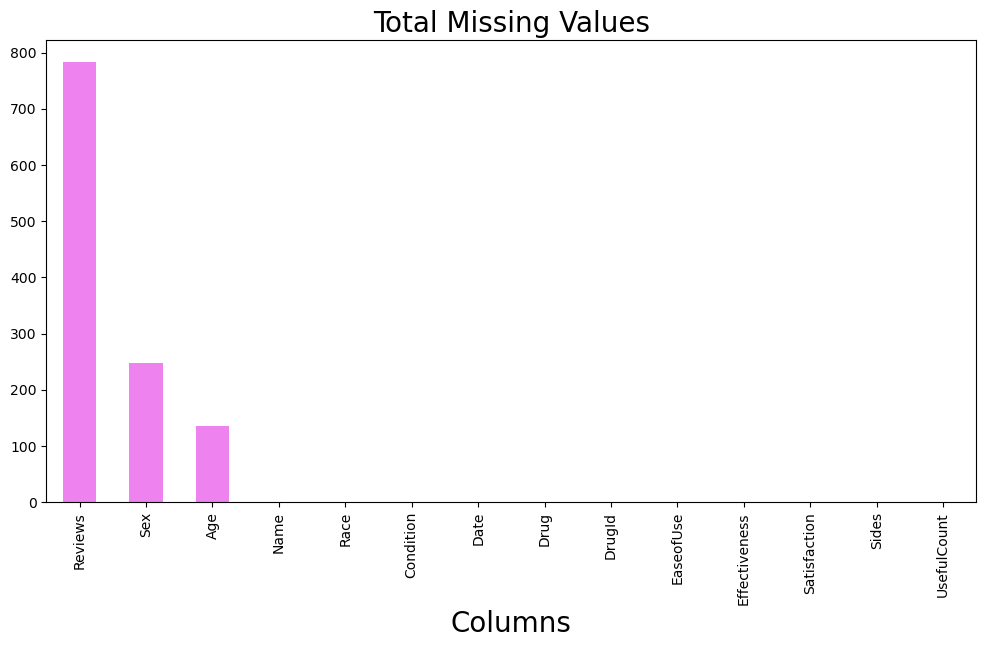

In [52]:
missing = (data_new.isnull().sum()).sort_values(ascending=False)
missing.plot(kind="bar", figsize = (12,6), fontsize = 10, color='violet')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [53]:
# Removing rows with null data

data_new=data_new.dropna(axis=0)

In [54]:
data_new.isnull().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [55]:
data_new.shape

(3263, 14)

## 3.Text processing

In [57]:
# Convert non-string values in 'Sides' column to strings
data_new['Sides'] = data_new['Sides'].astype(str)

# Convert non-string values in 'Reviews' column to strings
data_new['Reviews'] = data_new['Reviews'].astype(str)

# Convert non-string values in 'Condition' column to strings
data_new['Condition'] = data_new['Condition'].astype(str)


In [58]:
import re
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    i= re.sub("[\W+""]", " ",i)        
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))

### 3.1 Sides

In [59]:
data_new.Sides= data_new.Sides.apply(cleaning_text)
data_new.Sides

14356    dizziness lightheadedness tiredness headache o...
14358    dizziness lightheadedness tiredness headache o...
14364    dizziness lightheadedness tiredness headache o...
14367    dizziness lightheadedness tiredness headache o...
14369    dizziness lightheadedness tiredness headache o...
                               ...                        
18981    dizziness lightheadedness tiredness headache o...
18982    dizziness lightheadedness tiredness headache o...
18984    dizziness lightheadedness tiredness headache o...
18985    dizziness lightheadedness tiredness headache o...
18990    dizziness lightheadedness tiredness headache o...
Name: Sides, Length: 3263, dtype: object

In [61]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))  # Convert the list of stopwords to a set for faster lookup

data_new['Sides'] = data_new['Sides'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to C:\Users\Z I M B
[nltk_data]     A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
data_new['Sides']

14356    dizziness lightheadedness tiredness headache o...
14358    dizziness lightheadedness tiredness headache o...
14364    dizziness lightheadedness tiredness headache o...
14367    dizziness lightheadedness tiredness headache o...
14369    dizziness lightheadedness tiredness headache o...
                               ...                        
18981    dizziness lightheadedness tiredness headache o...
18982    dizziness lightheadedness tiredness headache o...
18984    dizziness lightheadedness tiredness headache o...
18985    dizziness lightheadedness tiredness headache o...
18990    dizziness lightheadedness tiredness headache o...
Name: Sides, Length: 3263, dtype: object

### 3.2 Reviews

In [63]:
data_new.review= data_new.Reviews.apply(cleaning_text)
data_new.review

14356    have developed very itch rash body almost year...
14358    tried alternative medicine beet root hibiscus ...
14364    have been taking doses over years body stays r...
14367    like that taking this knowing suddenly higher ...
14369    this medicine about months have been coughing ...
                               ...                        
18981    prescribed this medication prevent kidney dama...
18982    year male with type diabetes given control pro...
18984    losing wweight diuretic added think have also ...
18985    took pill about hours later thought that havei...
18990    have been taking this days daily gives cough h...
Name: Reviews, Length: 3263, dtype: object

In [64]:
#Removing stopwords

data_new['Reviews'] = data_new['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [65]:
data_new['Reviews']

14356    I developed itch rash body almost 5 years, I a...
14358    tried alternative medicine Beet root, hibiscus...
14364    Have taking 10 mg doses per day 9 years body s...
14367    I like I'm taking knowing BP suddenly 20-25 pt...
14369    Was medicine 2 months coughing head especially...
                               ...                        
18981    I prescribed medication prevent kidney damage ...
18982    I 51 year old male type II diabetes. Was given...
18984    Am losing wweight due diuretic added I think. ...
18985    I took one 10mg pill 4 hours later thought I h...
18990    I taking 60 days 2.5mg daily. It gives dry cou...
Name: Reviews, Length: 3263, dtype: object

### 3.3 Condition

In [66]:
data_new.Condition=data_new.Condition.apply(cleaning_text)
data_new.Condition

14356             high blood pressure
14358             high blood pressure
14364             high blood pressure
14367             high blood pressure
14369             high blood pressure
                     ...             
18981    kidney disease from diabetes
18982             high blood pressure
18984             high blood pressure
18985             high blood pressure
18990                           other
Name: Condition, Length: 3263, dtype: object

## 4.Handling Age group

In [67]:
data_new['Age'].value_counts()

55-64         956
45-54         880
65-74         574
35-44         429
75 or over    245
25-34         153
19-24          22
13-18           3
0-2             1
Name: Age, dtype: int64

In [68]:
data_new['Age'].unique()

array(['75 or over', '55-64', '65-74', '25-34', '35-44', '45-54', '19-24',
       '13-18', '0-2'], dtype=object)

In [69]:
data_new['Age']=data_new['Age'].str.replace('75 or over','75-100')

In [70]:
data_new['Age'].value_counts()

55-64     956
45-54     880
65-74     574
35-44     429
75-100    245
25-34     153
19-24      22
13-18       3
0-2         1
Name: Age, dtype: int64

## 5.Outliers detection and handling

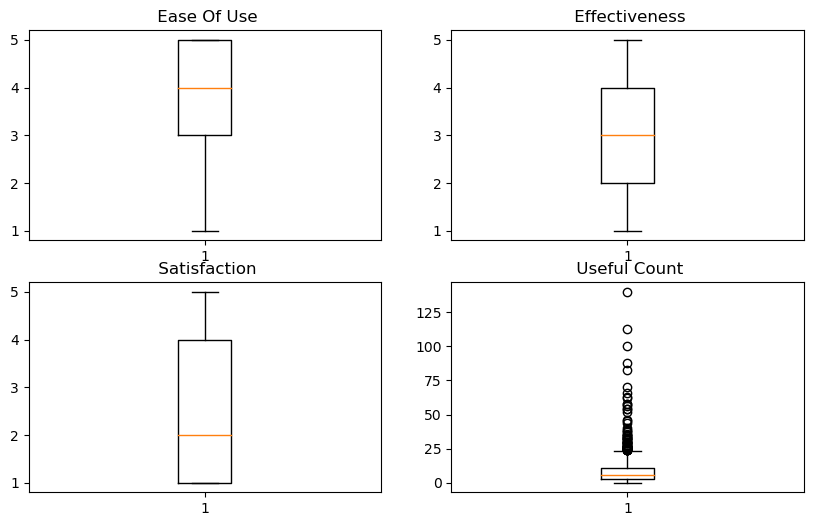

In [71]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_new["EaseofUse"])
plt.title(" Ease Of Use")

plt.subplot(2,2,2)
plt.boxplot(data_new["Effectiveness"])
plt.title(" Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data_new["Satisfaction"])
plt.title(" Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data_new["UsefulCount"])
plt.title(" Useful Count")
plt.show()

**Insight:**<br>
    
Outliers are present in UsefulCount columns.

**Removing outliers**

In [72]:
# define a function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

In [73]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['UsefulCount']:
    index_list.extend(outliers(data_new,feature))
index_list

[14371,
 14373,
 14393,
 14435,
 14477,
 14481,
 14483,
 14543,
 14577,
 15231,
 15281,
 15307,
 15308,
 15311,
 15316,
 15324,
 15360,
 15432,
 15435,
 15436,
 15438,
 15449,
 15463,
 15467,
 15589,
 15629,
 15675,
 15843,
 15929,
 15958,
 15962,
 15963,
 15985,
 15992,
 15994,
 16011,
 16017,
 16020,
 16024,
 16165,
 16344,
 16526,
 16538,
 16541,
 16542,
 16544,
 16545,
 16682,
 16693,
 16697,
 16779,
 16852,
 17396,
 17479,
 17499,
 17972,
 18067,
 18085,
 18176,
 18322,
 18364,
 18504,
 18508,
 18684,
 18851,
 18891,
 18905,
 18939,
 18958,
 18990]

In [74]:
#define a function called 'remove' which returns a cleaned data without outliers

def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

In [75]:
data_new.shape

(3263, 14)

In [76]:
data_new=remove(data_new,index_list)

In [77]:
data_new.shape

(3193, 14)

**UsefulCount column post removal of outliers**

Text(0.5, 1.0, 'Box plot of Useful Count')

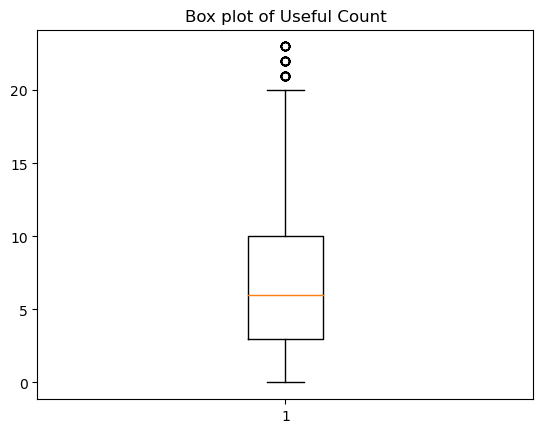

In [78]:
plt.boxplot(data_new["UsefulCount"])
plt.title('Box plot of Useful Count')

## 6.Feature engineering

In [79]:
#Creation of a new SideEffects column

data1=np.where(data_new['Satisfaction'] == 1.0, "Nil", data_new['Satisfaction'])
data1=np.where(data_new['Satisfaction'] == 2.0, "Mild",data1)
data1=np.where(data_new['Satisfaction'] == 3.0, "Moderate", data1)
data1=np.where(data_new['Satisfaction'] == 4.0, "Severe", data1)
data1=np.where(data_new['Satisfaction'] == 5.0, "Extreme",data1)

In [80]:
data_new['SideEffects']=data1

In [81]:
#Since DrugId is the same, dropping the column

data_new.drop(['Satisfaction','DrugId'], inplace=True, axis=1)

In [82]:
data_new.head()

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,Sex,Sides,UsefulCount,SideEffects
14356,Malik Bell,Hispanic,75-100,high blood pressure,02-08-2020,lisinopril,5.0,4.0,"I developed itch rash body almost 5 years, I a...",Female,dizziness lightheadedness tiredness headache o...,3.0,Severe
14358,Brenda Ortiz,Asian,55-64,high blood pressure,1/14/2020,lisinopril,4.0,5.0,"tried alternative medicine Beet root, hibiscus...",Male,dizziness lightheadedness tiredness headache o...,3.0,Severe
14364,Karen Gonzalez,Hispanic,65-74,high blood pressure,10/17/2019,lisinopril,5.0,5.0,Have taking 10 mg doses per day 9 years body s...,Male,dizziness lightheadedness tiredness headache o...,6.0,Extreme
14367,Taylor Smith,Asian,55-64,high blood pressure,10/13/2019,lisinopril,2.0,4.0,I like I'm taking knowing BP suddenly 20-25 pt...,Male,dizziness lightheadedness tiredness headache o...,12.0,Mild
14369,Stephen Harvey,Hispanic,55-64,high blood pressure,8/16/2019,lisinopril,3.0,1.0,Was medicine 2 months coughing head especially...,Female,dizziness lightheadedness tiredness headache o...,22.0,Nil


In [83]:
data_new.to_csv('drug_lisinopril_eda.csv', index=False)

In [84]:
data_copy = data_new.copy()

# Exploratory Data Analysis

## 1. Top 20 Drugs

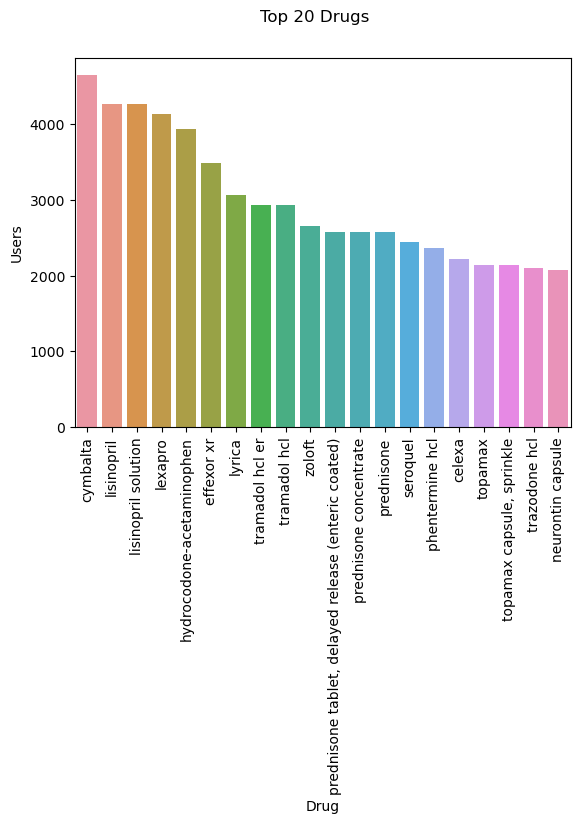

In [85]:
data1= data['Drug'].value_counts().head(20).reset_index()
data1.columns = ['Drug', 'Users']
sns.barplot(data=data1, x = 'Drug', y = 'Users')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

**Insight:**<br>
    
Cymbalta has the maximum number of users

## 2. Top 20 Conditions

Text(0, 0.5, 'Users')

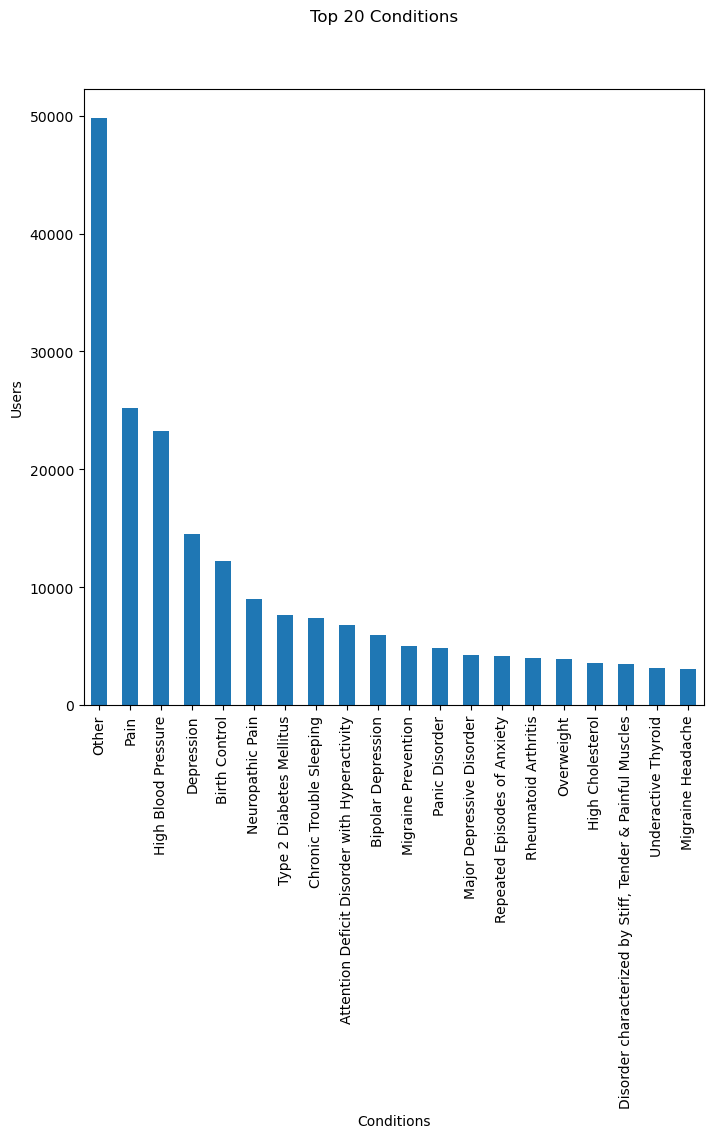

In [86]:
data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 20 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

**Insight:**<br>
    
Out of 1806 Conditions, Other Conditions tops the chart followed respectively by Pain and High Blood Pressure.

**The above being interpretation of the generic data, in line with the objective of OUR project,we will now move ahead by selecting a particular drug Lisinopril, one featuring in the top 5.**

## 3. Top 12 Conditions - Lisinopril

Text(0, 0.5, 'Count')

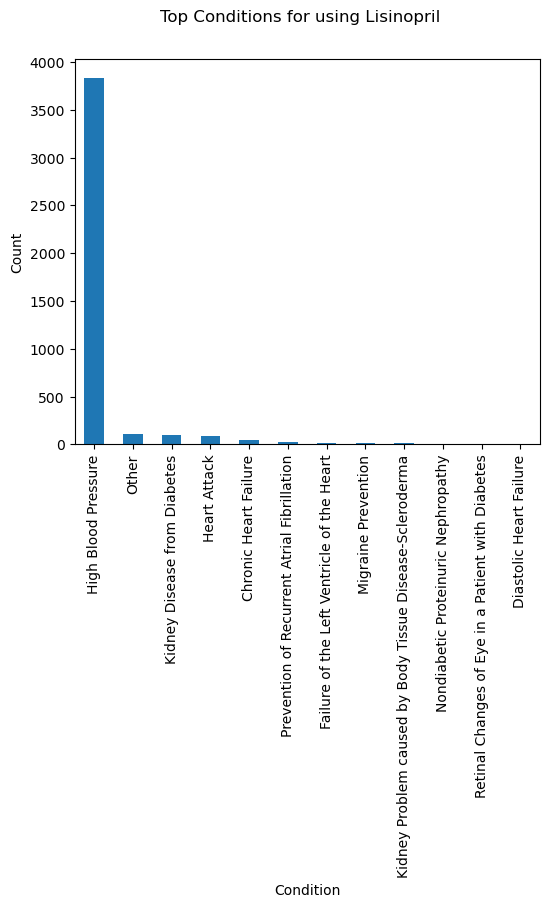

In [87]:
drug_lisinopril['Condition'].value_counts().nlargest(12).plot(kind='bar',figsize=(6,5))
plt.suptitle("Top Conditions for using Lisinopril")
plt.xlabel('Condition')
plt.ylabel('Count')

**Insight:**<br>
    
Maximum users consume the drug for High blood pressure. The drug is mainly used for 12 conditions listed above.

## 4. Users by Gender - Lisinopril

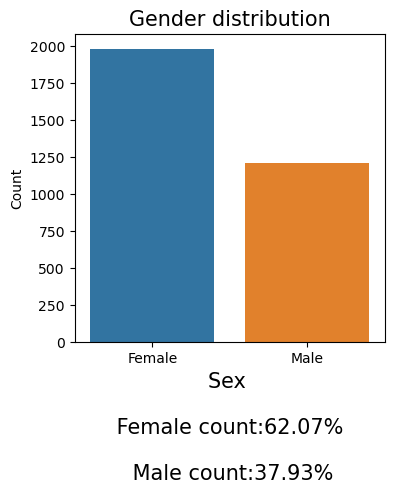

In [88]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=data_copy)
plt.title('Gender distribution', fontsize=15)
plt.xlabel('Sex \n \n Female count:{0:0.2f}% \n \n Male count:{1:0.2f}%'.format(data_copy['Sex'].value_counts(normalize=True)[0]*100, data_copy['Sex'].value_counts(normalize=True)[1]*100), fontsize=15)
plt.ylabel('Count') 
plt.show()


     

**Insight:**<br>
    
Females uses the drug more compared to males.

## 5. Users by Race - Lisinopril

Text(0, 0.5, 'Count')

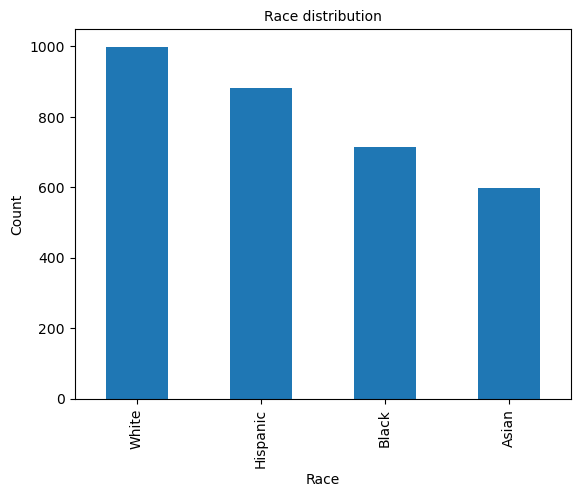

In [89]:
data_copy['Race'].value_counts().plot(kind='bar')
plt.title("Race distribution", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

**Insight:**<br>
    
Lisinopril drug is mostly consumed by Whites followed by Hispanic followed by Black and least used by Asian.

## 6. Users by Race and Gender

Text(0.5, 1.0, 'Users by Race and Gender')

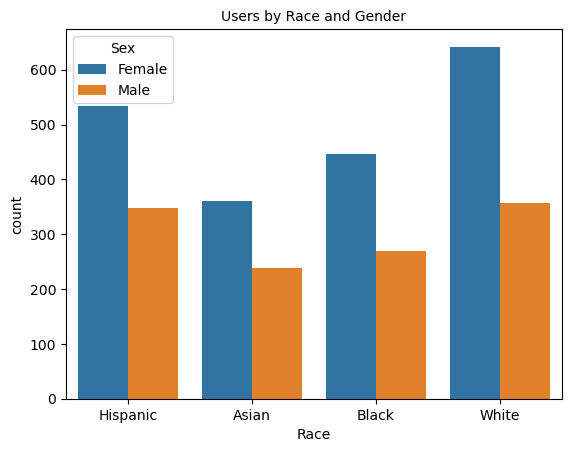

In [90]:
sns.countplot(x='Race',hue='Sex',data=data_copy)
plt.title("Users by Race and Gender", fontsize = 10)

**Insight:**<br>
    
Females dominate the consumption of Lisinopril drug within each race.

## 7. Users by Age and Gender

Text(0.5, 1.0, 'Users by Age and Gender')

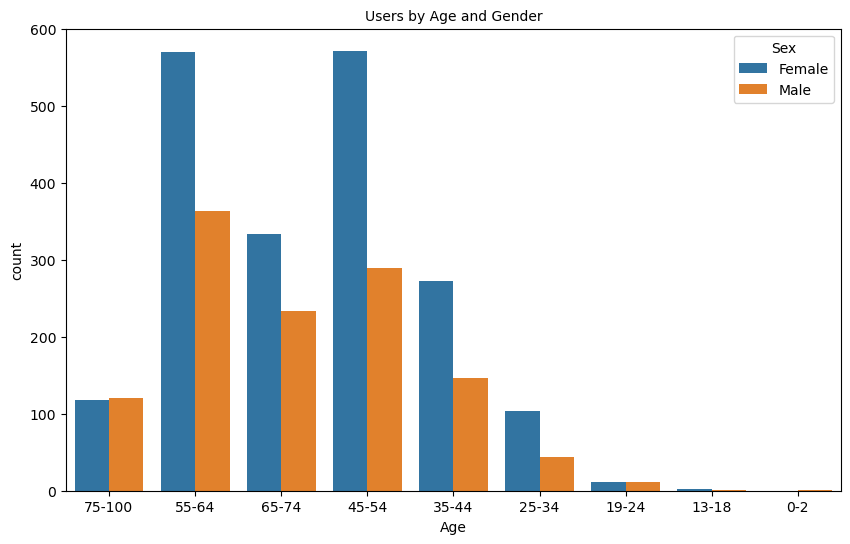

In [91]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data_copy)
plt.title("Users by Age and Gender", fontsize = 10)

**Insight:**<br>
    
Consumption of the drug by female users is visbly dominant across age groups above 24 and below 75 years. Plus, people in the age groups 45 to 54 and 55 to 64 accounted for maximum usage of Lisinopril.

## 8. Correlation Heatmap

<Axes: >

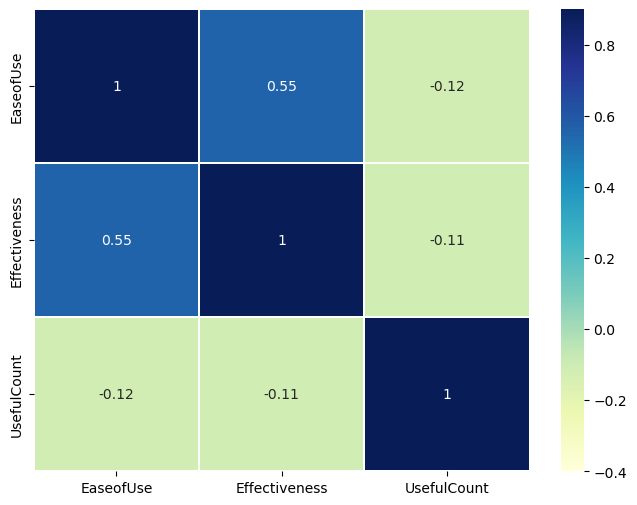

In [92]:
corrmatrix = data_copy.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

**Insight:**<br>
    
Correlation is used to find relationship between variables.
Here, variables are weakly or moderately correlated to each other.

## 9. Yearly Reviews - Lisinopril

In [93]:
data_copy['Date'] = pd.to_datetime(data_copy['Date'], errors = 'coerce')

In [94]:
#extracting year from Date

data_copy['Year'] = data_copy['Date'].dt.year

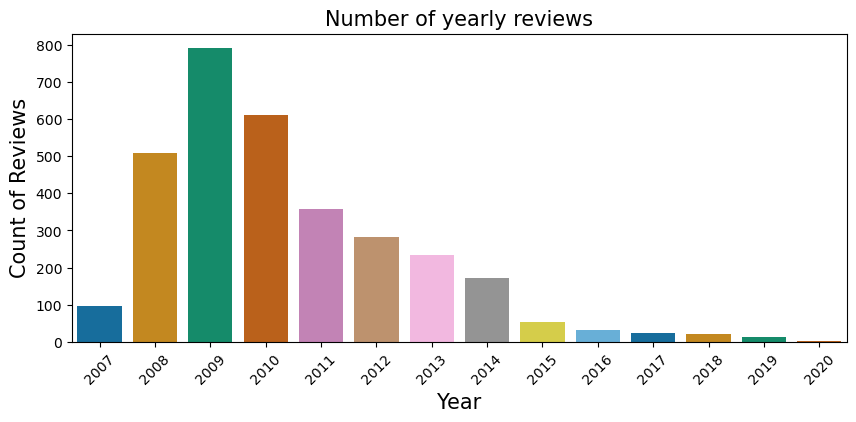

In [95]:

plt.figure(figsize=(10, 4))
sns.countplot(data=data_copy, x='Year', palette='colorblind')
plt.title('Number of yearly reviews', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count of Reviews', fontsize=15)
plt.xticks(rotation=45)
plt.show()


**Insight:**<br>
    
Lisinopril’s yearly reviews peaked in 2009 and reduced gradually thereafter.

## 10. Effectiveness

Text(0, 0.5, 'Count')

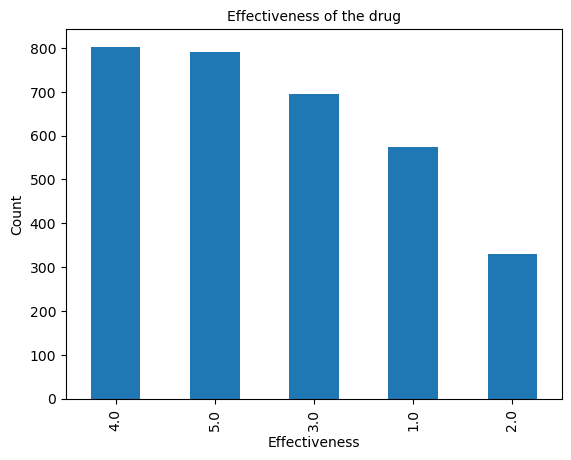

In [96]:
data_copy['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness of the drug", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

**Insight:**<br>
    
Most users found Lisinopril drug effective.But it cannot be considered the best drug as seen from the above graph.

## 11. Ease of Use

Text(0, 0.5, 'Count')

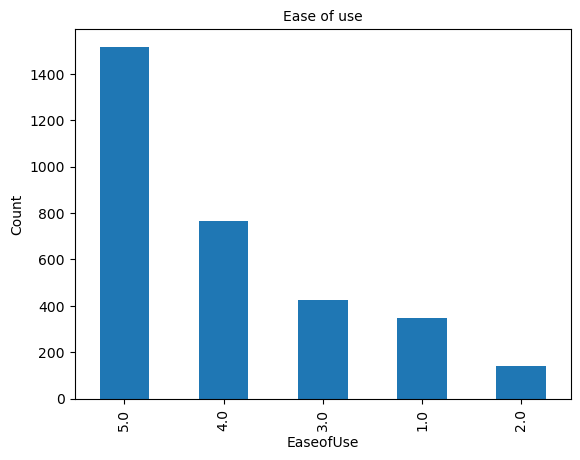

In [97]:
data_copy['EaseofUse'].value_counts().plot(kind='bar')
plt.title("Ease of use", fontsize = 10)
plt.xlabel("EaseofUse", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

**Insight:**<br>
    
Most users rated Lisinopril highly for its ease of use.

## 12. Useful Count

Text(0, 0.5, 'Count')

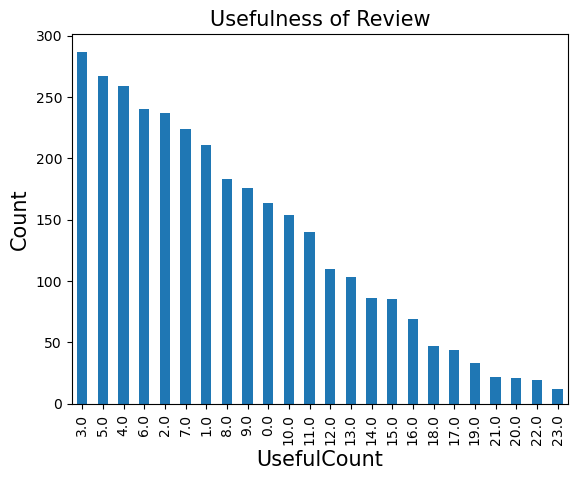

In [98]:
data_copy['UsefulCount'].value_counts().plot(kind='bar')
plt.title("Usefulness of Review", fontsize = 15)
plt.xlabel("UsefulCount", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

**Insight:**<br>
    
As with usefulness of reviews, Lisinopril users throw a mixed bag with most not finding the reviews beneficial.

## 13. Users by Effectiveness and Gender

<Figure size 1000x800 with 0 Axes>

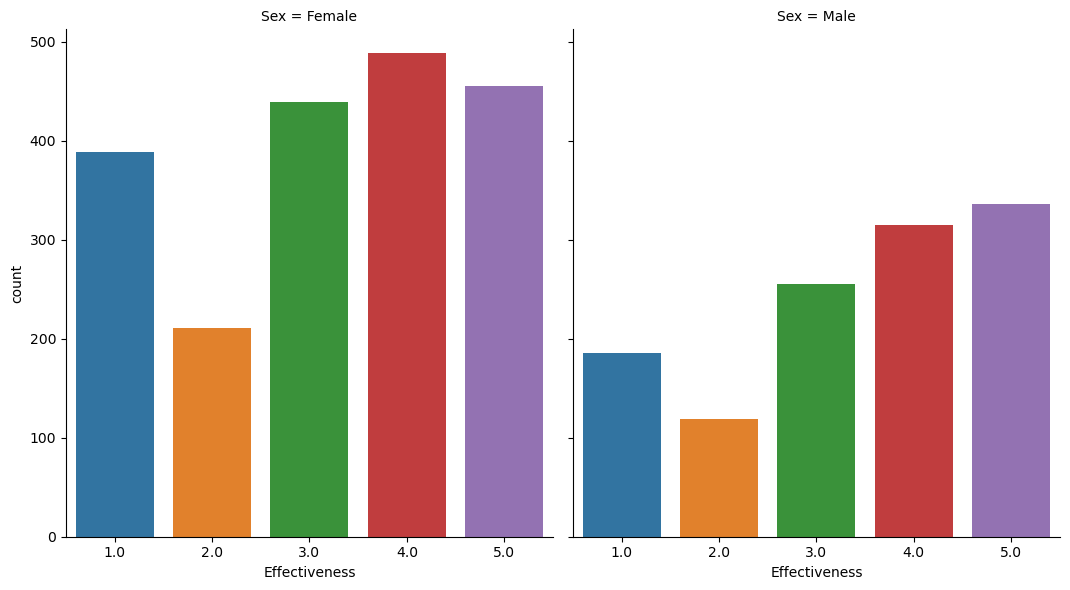

In [99]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data_copy, kind="count",
                height=6,aspect =.9)

**Insight:**<br>
    
Males and females have similar kind of effectiveness review for the drug. Graphs look different as the male consumption of the is drug is low compared to females.Most males were totally satisfied with the effectiveness of the drug. But thats not the case with females.

## 14. Side Effects

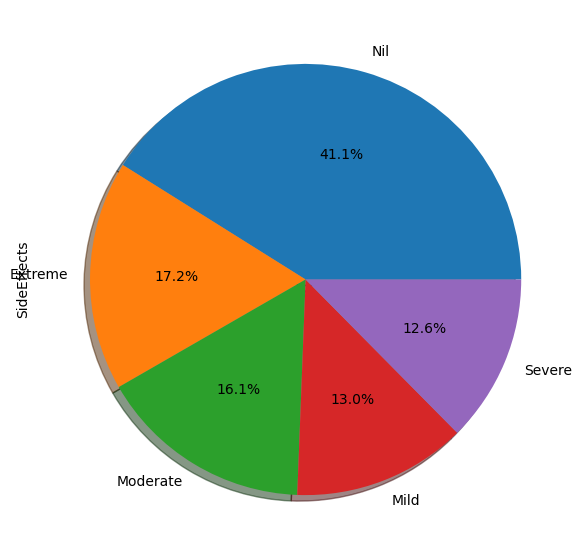

In [100]:
plt.figure(figsize=(7,7))
data_copy['SideEffects'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

**Insight:**<br>
    
Majority of consumers did not have any side effects. Many had Extreme side effects, some had Moderate side effects, a few had Mild side effect and a very few had Severe side effect.

## 15. Side Effects with respect to Age

<Axes: xlabel='Age', ylabel='count'>

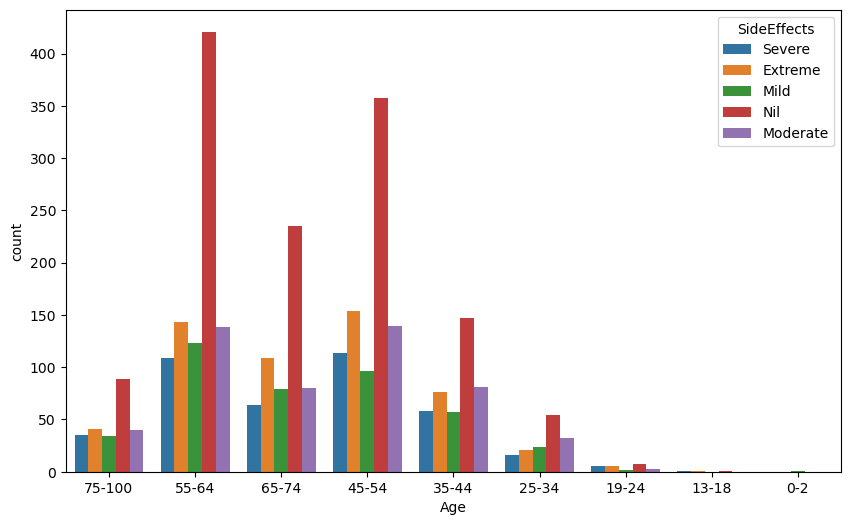

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='SideEffects',data=data_copy)

**Insight:**<br>
    
In almost all age groups majority of consumers did not have any side effects. No side effects topped in the age groups between 55-64.

## 16. Side Effects with respect to Gender

<Figure size 2000x1000 with 0 Axes>

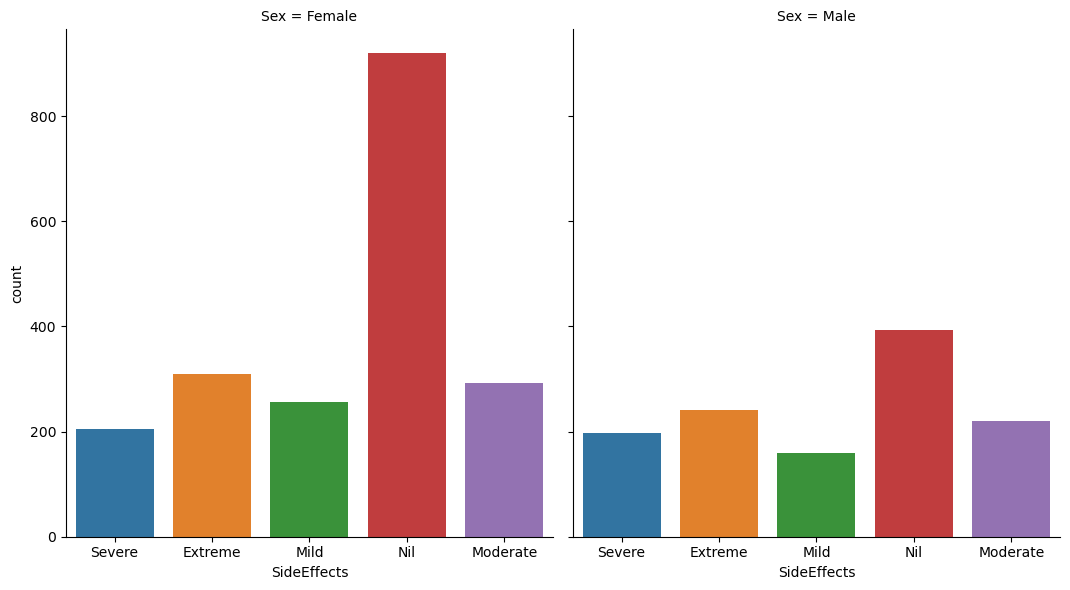

In [102]:
plt.figure(figsize=(20,10))
g = sns.catplot(x="SideEffects",col="Sex",data=data_copy, kind="count",height=6,aspect =.9)

**Insight:**<br>
    
For females, majority did not have any side effects. In the case of males, Extreme and Moderate side effect cases are not very low compared to no side effects.

## 17. Side Effects with respect to Race

<Axes: xlabel='Race', ylabel='count'>

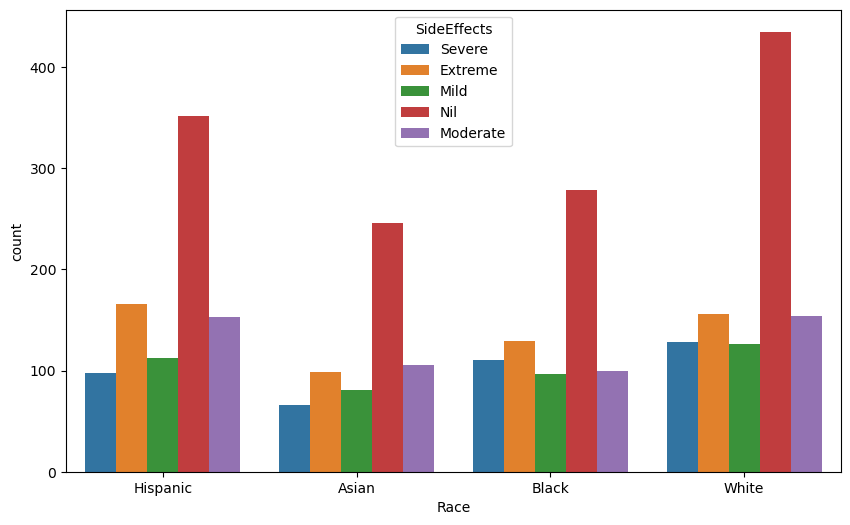

In [103]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='SideEffects',data=data_copy)

**Insight:**<br>
    
Side effects proved race neutral with proportionate results.

## 7. Feature reduction

**Correlation analysis**

<Axes: >

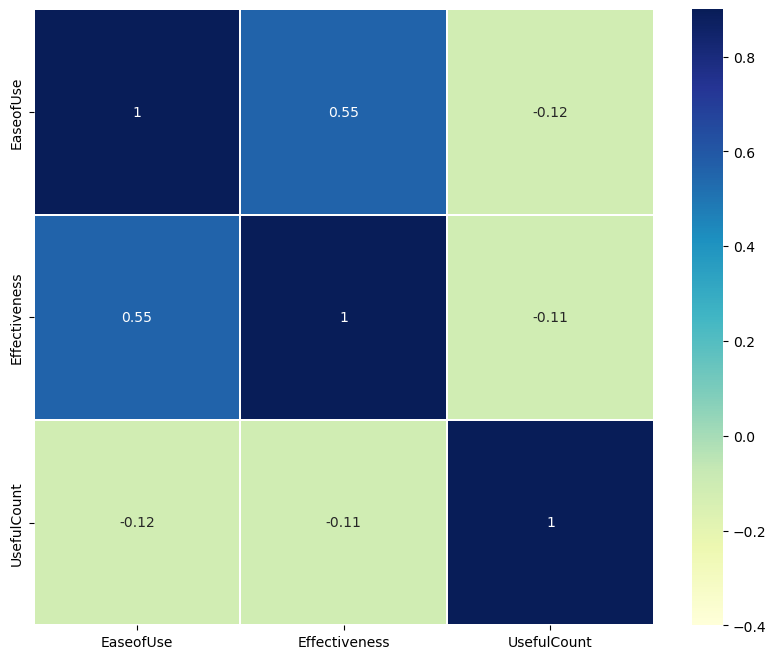

In [104]:
corrmatrix = data_new.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

Correlation matrix is plotted to check the relationship between variables

**Dropping the Drug and Sides column as there is only one variable in that feature. The other columns such as Name, Race, Date, EaseofUse, Reviews and UsefulCount are also being dropped as these does not contribute anything towards the side effects of the drug.**

In [105]:
data_new=data_new.drop(columns = ['Name','Race','Date','Drug','EaseofUse','Reviews','Sides','UsefulCount'],axis=1)
data_new=data_new.reset_index(drop=True)
data_new.head()

,Age,Condition,Effectiveness,Sex,SideEffects
0,75-100,high blood pressure,4.0,Female,Severe
1,55-64,high blood pressure,5.0,Male,Severe
2,65-74,high blood pressure,5.0,Male,Extreme
3,55-64,high blood pressure,4.0,Male,Mild
4,55-64,high blood pressure,1.0,Female,Nil


In [106]:
data_new.shape

(3193, 5)

## 8. Encoding

In [107]:
#Finding categorical columns and changing datatype

for cl in data_new.select_dtypes(include = ['object']):
    data_new[cl]=data_new[cl].astype('category')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            3193 non-null   category
 1   Condition      3193 non-null   category
 2   Effectiveness  3193 non-null   float64 
 3   Sex            3193 non-null   category
 4   SideEffects    3193 non-null   category
dtypes: category(4), float64(1)
memory usage: 38.6 KB


In [108]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [109]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            3193 non-null   category
 1   Condition      3193 non-null   category
 2   Effectiveness  3193 non-null   float64 
 3   Sex            3193 non-null   category
 4   SideEffects    3193 non-null   category
dtypes: category(4), float64(1)
memory usage: 38.6 KB


In [110]:
data_new.columns

Index(['Age', 'Condition', 'Effectiveness', 'Sex', 'SideEffects'], dtype='object')

In [111]:
data_new.head()

,Age,Condition,Effectiveness,Sex,SideEffects
0,75-100,high blood pressure,4.0,Female,Severe
1,55-64,high blood pressure,5.0,Male,Severe
2,65-74,high blood pressure,5.0,Male,Extreme
3,55-64,high blood pressure,4.0,Male,Mild
4,55-64,high blood pressure,1.0,Female,Nil


In [112]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in ['Age','Condition','Sex','SideEffects']:   
    data_new[col]=label.fit_transform((data_new[col]).astype(str))
    
data_label=data_new

In [113]:
data_new.head()

,Age,Condition,Effectiveness,Sex,SideEffects
0,8,4,4.0,0,4
1,6,4,5.0,1,4
2,7,4,5.0,1,0
3,6,4,4.0,1,1
4,6,4,1.0,0,3


# Splitting the data

**Selecting the most important and relevent features with respect to the target column for modelling**

In [114]:
#target

y = data_new['SideEffects']

In [115]:
X = data_new.drop(['SideEffects'],axis=1)

In [116]:
X.shape

(3193, 4)

In [117]:
X.head()

,Age,Condition,Effectiveness,Sex
0,8,4,4.0,0
1,6,4,5.0,1
2,7,4,5.0,1
3,6,4,4.0,1
4,6,4,1.0,0


In [118]:
y.head()

0    4
1    4
2    0
3    1
4    3
Name: SideEffects, dtype: int32

**Splitting the dataset into train and test sets**

In [119]:
#Importing train_test_split from the sklearn.model_selection library and 
#splitting the data,by keeping 80% of the data in train dataset and the rest 20% in test dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)

In [120]:
X_train.shape

(2554, 4)

In [121]:
X_test.shape

(639, 4)

In [122]:
y_train.shape

(2554,)

In [123]:
y_test.shape

(639,)

# Model Building

## 1. Logistic Regression Model

In [124]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='multinomial')
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,classification_report

**Performance Evaluation**

In [126]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  53.834115805946794


**Confusion Matrix of Logistic Regression Model**

In [127]:
confusion_matrix(y_test,y_pred)

array([[ 77,   0,   5,  14,   2],
       [  9,   0,   5,  80,   5],
       [ 14,   0,  10,  67,   6],
       [ 20,   0,   1, 241,   8],
       [ 17,   0,   8,  34,  16]], dtype=int64)

## 2. KNN Model

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
acc_values = []
neighbors = np.arange(3,15)

# creating a loop to create KNN model for each K value
for k in neighbors:
#taking the instance of KNN to a variable.the variable name is classifier.
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski')    #no: of neighbors n the methode to measure the distance .instance is created
#we have to create the model.
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(X_train,y_train)
#have to predict output using this model.
    y_pred = classifier.predict(X_test)#KNN is created
#append the accurcy values to empty list in order to fing out maximum accuracy.
    acc = accuracy_score(y_test, y_pred)#taking accuracy values to variable acc 
#append these accuracy values to our list
    acc_values.append(acc)

In [130]:
acc_values

[0.5039123630672926,
 0.513302034428795,
 0.5070422535211268,
 0.5070422535211268,
 0.5039123630672926,
 0.514866979655712,
 0.5179968701095462,
 0.514866979655712,
 0.5101721439749609,
 0.5367762128325508,
 0.5211267605633803,
 0.5226917057902973]

**To find which k value got the highest accuracy, plotted a graph between neighbor values (i.e. k values) and accuracy values**

Text(0, 0.5, 'accuracy')

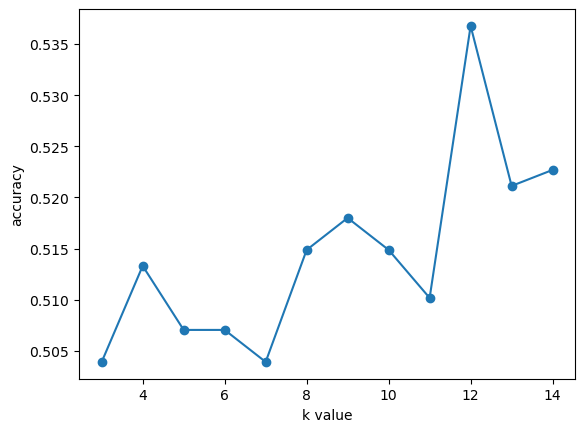

In [131]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

**KNN model with k=14**

In [132]:
classifier = KNeighborsClassifier(n_neighbors= 14, metric = 'minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

**Performance Evaluation**

In [133]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  52.26917057902973


**Confusion Matrix for KNN Classifier**

In [134]:
confusion_matrix(y_test,y_pred)

array([[ 78,   6,   1,   7,   6],
       [ 11,  13,  19,  51,   5],
       [ 14,  16,  21,  34,  12],
       [ 20,  23,  16, 206,   5],
       [ 18,   6,   7,  28,  16]], dtype=int64)

## 3. Decision Tree Classifier

In [135]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

**Performance Evaluation**

In [136]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  55.08607198748044


**Confusion Matrix of Decision Tree Model**

## 4. Support Vector Machine

### a. Linear SVM

In [137]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')      #creating an instance
svm_linear.fit(X_train,y_train)
y_pred = svm_linear.predict(X_test)

**Performance Evaluation**

In [138]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  53.52112676056338


**Confusion Matrix of Linear SVM Model**

In [139]:
confusion_matrix(y_test,y_pred)

array([[ 77,   0,   1,  15,   5],
       [  9,   0,   3,  80,   7],
       [ 14,   0,   1,  66,  16],
       [ 20,   0,   0, 241,   9],
       [ 17,   0,   0,  35,  23]], dtype=int64)

### b. Polynomial SVM

In [140]:
svm_poly = SVC(kernel = 'poly', degree=3)
svm_poly.fit(X_train,y_train)
y_pred = svm_poly.predict(X_test)

**Performance Evaluation**

In [141]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  54.460093896713616


**Confusion Matrix of Linear SVM Model**

In [142]:
confusion_matrix(y_test,y_pred)

array([[ 77,   0,   5,  14,   2],
       [  9,   2,   8,  74,   6],
       [ 14,   2,   9,  63,   9],
       [ 20,   0,   1, 241,   8],
       [ 17,   2,   5,  32,  19]], dtype=int64)

### c. Radial SVM

In [143]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)

**Performance Evaluation**

In [144]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  54.61658841940532


**Confusion Matrix of Linear SVM Model**

In [145]:
confusion_matrix(y_test,y_pred)

array([[ 77,   0,   1,  13,   7],
       [  9,   0,   6,  75,   9],
       [ 14,   0,   8,  59,  16],
       [ 20,   0,   0, 241,   9],
       [ 17,   0,   3,  32,  23]], dtype=int64)

## 5. Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
#training the model
rf.fit(X_train,y_train)
#to make predictions
y_pred=rf.predict(X_test)

**Performance Evaluation**

In [147]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  55.08607198748044


**Confusion Matrix**

In [148]:
confusion_matrix(y_test,y_pred)

array([[ 78,   1,   1,   3,  15],
       [  9,   7,  18,  47,  18],
       [ 14,   3,  27,  32,  21],
       [ 21,   5,  18, 201,  25],
       [ 18,   0,  10,   8,  39]], dtype=int64)

**Feature Importance**

In [149]:
pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)*100

Effectiveness    75.222943
Age              11.161842
Condition        10.616233
Sex               2.998982
dtype: float64

**Fine Tuning of hyper parameters**

In [150]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [151]:
# creating another instance of random forest classifier with some changes in hyperparameter
rft= RandomForestClassifier(bootstrap=True, n_estimators=1000,max_depth=8,random_state =42,criterion='entropy')

In [152]:
rft.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=1000,
                       random_state=42)

In [153]:
y_pred=rft.predict(X_test)

In [154]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  55.712050078247266


## 6. Gradient Boosting

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

**Performance Evaluation**

In [156]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  55.86854460093896


**Confusion Matrix**

In [157]:
confusion_matrix(y_test,y_pred)

array([[ 78,   0,   2,   7,  11],
       [ 10,   5,  17,  51,  16],
       [ 14,   0,  31,  32,  20],
       [ 20,   5,  15, 212,  18],
       [ 17,   0,   9,  18,  31]], dtype=int64)

## 7. Extreme Gradient Boosting

In [158]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [159]:
from xgboost import XGBClassifier
#creating an instance
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred= xgb.predict(X_test)

**Performance Evaluation**

In [160]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  55.39906103286385


**Confusion Matrix**

In [161]:
confusion_matrix(y_test,y_pred)

array([[ 78,   1,   1,   3,  15],
       [  9,   8,  14,  49,  19],
       [ 14,   3,  27,  32,  21],
       [ 20,   6,  16, 202,  26],
       [ 18,   0,   9,   9,  39]], dtype=int64)

**Inference:<br>**
    
**Accuracies of classification models:<br>**

1.Logistic Regression -------------- 53.83%

2.KNN Model ------------------------- 55.08%

3.Decision Tree Classifier --------- 55.08%

4.Support Vector Machine:

    .Linear SVM -------------------- 53.52%

    .Polynomial SVM ---------------- 54.46%

    .Radial SVM -------------------- 54.61%

5.Random Forest -------------------- 55.08%

     Fine-tuning Random Forest ----- 55.71%

6.Gradient Boosting ---------------- 55.86%

7.Extreme Gradient Boosting ---- 55.55%